<a href="https://colab.research.google.com/github/ramana3070/Houseprice_prediction_final/blob/main/Midterm_Winter_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam - Winter 2025

Save this notebook to your own area.
Rename the notebook and user your name for the new name of the notebook.
Make sure that the notebook is available to anybody with the address.

In your exam (in paper) you will find two lines of python code.
Insert them at the beginning of the main portion of the code.
Right after this line:

if __name__ == "__main__":

The code, as it is in the initial state of the notebook, will not run.
It will run, after you insert those two lines of code.

After you correct the code, the code will report an execution time and it will produce a plot.

Calculation for size  1500  took:  82.57037615776062


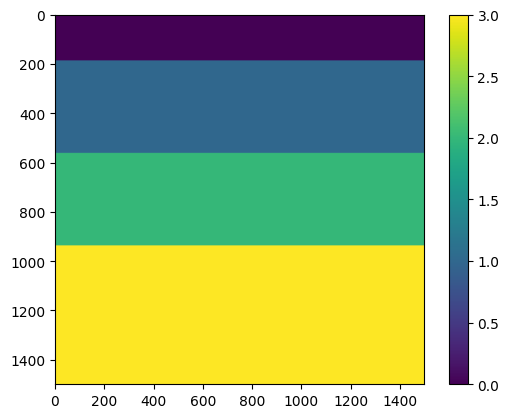

In [ ]:
# Sequential approximate Voronoi

import numpy as np
import matplotlib.pyplot as plt
import time



def calculate_voronoi(size,seeds):
  area = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      closest_seed = -1
      closest_distance = size*size
      for k in range(len(seeds)):
        point1 = np.array([float(seeds[k][0]),float(seeds[k][1])])
        point2 = np.array((float(i),float(j)))
        temp = point1 - point2
        sum_sq = np.sum(np.square(temp))
        dist = np.sqrt(sum_sq)
        if dist < closest_distance:
          closest_distance = dist
          closest_seed = k
      area[i][j] = closest_seed
  return area



if __name__ == "__main__":
  # Insert the 2 lines that you will find in your exam here:
  size=1500
  seeds=np.array([[0,size//2],[size//4,size//2],[size//2,size//2],[(size*3)//4,size//2]])


  start = time.time()
  area = calculate_voronoi(size,seeds)
  end = time.time()
  elapsed = end - start
  print("Calculation for size ",size," took: ",elapsed)
  plt.imshow(area, cmap='viridis')
  plt.colorbar()
  plt.show()

Now we will install the library that will allow us to profile the code

In [ ]:
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 11.0 MB/s eta 0:00:00


Repeat the process of inserting the two lines of code in the cell below.
This cell contains  the  decorator
@profile
right before this line of code:

def calculate_voronoi(size,seeds):

This will allow you to profile the execution of the program.

In [ ]:
%%writefile voronoi.py
# Sequential approximate Voronoi

import numpy as np
import matplotlib.pyplot as plt
import time


@profile
def calculate_voronoi(size,seeds):
  area = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      closest_seed = -1
      closest_distance = size*size
      for k in range(len(seeds)):
        point1 = np.array([float(seeds[k][0]),float(seeds[k][1])])
        point2 = np.array((float(i),float(j)))
        temp = point1 - point2
        sum_sq = np.sum(np.square(temp))
        dist = np.sqrt(sum_sq)
        if dist < closest_distance:
          closest_distance = dist
          closest_seed = k
      area[i][j] = closest_seed
  return area



if __name__ == "__main__":
  # Insert the 2 lines that you will find in your exam here:
  size=1500
  seeds=np.array([[0,size//2],[size//4,size//2],[size//2,size//2],[(size*3)//4,size//2]])

  start = time.time()
  area = calculate_voronoi(size,seeds)
  end = time.time()
  elapsed = end - start
  print("Calculation for size ",size," took: ",elapsed)
  plt.imshow(area, cmap='viridis')
  plt.colorbar()
  plt.show()

Writing voronoi.py


Now, profile the code:

In [ ]:
!kernprof -l voronoi.py

Calculation for size  1500  took:  190.60920548439026
Figure(640x480)
Wrote profile results to voronoi.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "voronoi.py.lprof"


Now we will look at the result of profiling the code:


In [ ]:
!python3 -m line_profiler -rmt  "voronoi.py.lprof"

Timer unit: 1e-06 s

Total time: 154.848 s
File: voronoi.py
Function: calculate_voronoi at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                           @profile                                           
     9                                           def calculate_voronoi(size,seeds):                 
    10         1         25.0     25.0      0.0    area = np.zeros((size,size))                     
    11      1501        538.8      0.4      0.0    for i in range(size):                            
    12   2251500     695139.1      0.3      0.4      for j in range(size):                          
    13   2250000     564440.1      0.3      0.4        closest_seed = -1                            
    14   2250000     870303.2      0.4      0.6        closest_distance = size*size                 
    15  11250000    4886694.5      0.4      3.2        for k in range(len(seeds)):                  
    16   9000000   21223134.3 

In your exam, there is a table to be filled. Write the answers to these questions:
To answer how many times a line was executed, look at the column labeled "Hits"
1. How many times was line 11 executed?
2. How many times was line 12 executed?
3. How many times was line 15 executed?
4. How many times was line 19 executed?
5. How many times was line 24 executed?

To answer the following questions, look at the column labeled "Time"
6. How much time was spent executing line 11?
7. How much time was spent executing line 12?
8. How much time was spent executing line 15?
9. How much time was spent executing line 19?
10. How much time was spent executing line 24?





Lines 11 through 24 can be parallelized. Add the percentages of execution times for lines 11 through 24.
Convert the sum of those percentages into a portion between 0 and 1 by diving by 100. That is the portion of the code that is parallelizable.

Using this simplified version of Amdahl's law

S = 1 / ( 1 - ParallelizablePortionOfTheCode)

Based on Amdahl's law, what is the maximum speedup for the function calculate Voronoi?

Now, use numba to compile the code and to parallelize it.

Start by adding the same two instructions that you added in the code cell 1.

As you did in project 2, add the proper decorator and the proper prange statement to make numba compile the code and parallelize it.

Calculation for size  1500  took:  83.29390621185303


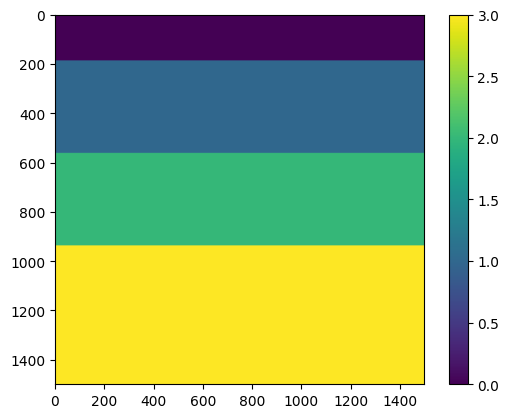

In [ ]:

# Approximate Voronoi

import numpy as np
import matplotlib.pyplot as plt
import time
import numba



def calculate_voronoi(size,seeds):
  area = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      closest_seed = -1
      closest_distance = size*size
      for k in range(len(seeds)):
        point1 = np.array([float(seeds[k][0]),float(seeds[k][1])])
        point2 = np.array((float(i),float(j)))
        temp = point1 - point2
        sum_sq = np.sum(np.square(temp))
        dist = np.sqrt(sum_sq)
        if dist < closest_distance:
          closest_distance = dist
          closest_seed = k
      area[i][j] = closest_seed
  return area



if __name__ == "__main__":
  # Insert the 2 lines that you will find in your exam here:
  size=1500
  seeds=np.array([[0,size//2],[size//4,size//2],[size//2,size//2],[(size*3)//4,size//2]])


  start = time.time()
  area = calculate_voronoi(size,seeds)
  end = time.time()
  elapsed = end - start
  print("Calculation for size ",size," took: ",elapsed)
  plt.imshow(area, cmap='viridis')
  plt.colorbar()
  plt.show()